# Imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datasets

In [31]:
histogram_df = pd.read_csv('./datasets/brazil_economy_indicators.csv')
barplot_df = histogram_df

# Histograma - Taxa de desemprego no Brasil

### Remoção de NAN

In [32]:
histogram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            121 non-null    object 
 1   econ_act        117 non-null    float64
 2   unemploy        117 non-null    float64
 3   credit_cost     114 non-null    float64
 4   ent_debt        113 non-null    float64
 5   peo_debt        113 non-null    float64
 6   perm_ext_inv    117 non-null    float64
 7   bal_comex       117 non-null    float64
 8   int_reserves    118 non-null    float64
 9   nom_res         118 non-null    float64
 10  prim_res        118 non-null    float64
 11  gross_debt_gov  119 non-null    float64
 12  net_debt_gov    119 non-null    float64
 13  int_inv_pos     118 non-null    float64
 14  inflation       121 non-null    float64
 15  interest_rate   121 non-null    float64
 16  usd_brl         121 non-null    float64
dtypes: float64(16), object(1)
memory us

In [33]:
histogram_df = histogram_df.dropna(subset=['unemploy'])

### Construção do histograma

Text(0, 0.5, 'Frequência mensal')

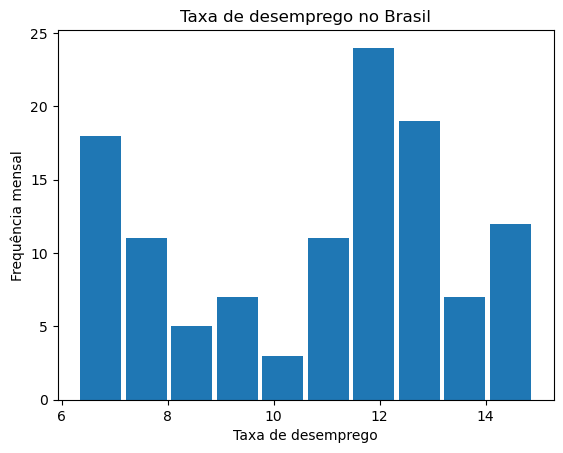

In [34]:
plt.hist(histogram_df['unemploy'], rwidth=0.9)
plt.title('Taxa de desemprego no Brasil')
plt.xlabel('Taxa de desemprego')
plt.ylabel('Frequência mensal')

### Observação sobre o resultado
- A faixa de desemprego mais frequente se concentra entre 12 e 13 por cento.
- Definitivamente não segue uma distribuição normal.

# Gráfico em barra - Últimos 12 meses de taxa de desemprego no Brasil

### Remoção de NAN

In [35]:
barplot_df = barplot_df.dropna(subset=['unemploy'])

### Extração dos dados

In [36]:
unemployment_rate = barplot_df['unemploy'][-12:]
date = np.array([date[3:] for date in barplot_df['date'][-12:]])

### Construção do gráfico de barras

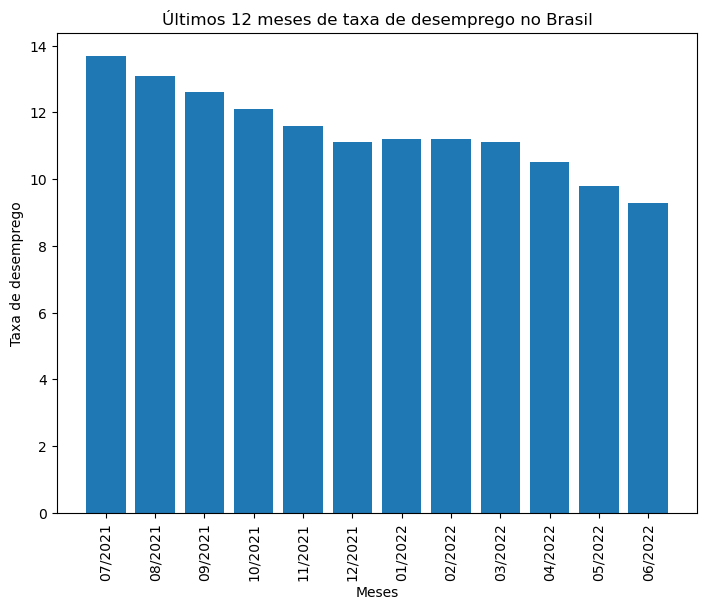

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(date,unemployment_rate)
plt.xticks(rotation=90)
plt.title('Últimos 12 meses de taxa de desemprego no Brasil')
plt.xlabel('Meses')
plt.ylabel('Taxa de desemprego')
plt.show()

### Observação sobre o resultado
- Percebe-se uma redução gradual com o final da pandemia.